In [1]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
data= pd.read_excel('600085copy.xlsx')
data=data.drop(columns=['Date','Close','Open','High','Low'])
data

,updowm,振幅,涨跌幅,换手率,MA5,MA20,RSV,K,D,J,DIF,DEA,MACD,RSI6,RSI12,CCI 14,OBV,BOLLMID,BOLLUPPER,BOLLLOWER
0,1,1.83,-0.41,0.92,19.652,19.5270,79.878049,80.642486,75.104939,91.717581,-0.167664,-0.249047,0.162765,54.181109,49.427043,57.415079,-226454,19.5270,20.593664,18.460336
1,1,3.62,2.04,1.27,19.710,19.4865,93.333333,84.872769,78.360882,97.896541,-0.115555,-0.222348,0.213587,65.356418,54.866154,105.018272,-52269,19.4865,20.394575,18.578425
2,0,4.10,2.00,1.24,19.896,19.4860,92.708333,87.484624,81.402129,99.649612,-0.041502,-0.186179,0.289354,73.200231,59.605520,146.317531,117835,19.4860,20.391896,18.580104
3,0,4.75,-1.27,1.25,19.984,19.4920,61.375661,78.781636,80.528632,75.287645,-0.003752,-0.149694,0.291884,62.213173,55.474890,139.382920,-53905,19.4920,20.414778,18.569222
4,1,3.47,-2.38,0.80,19.980,19.4890,25.308642,60.957305,74.004856,34.862202,-0.012423,-0.122239,0.219633,46.688351,48.680627,44.100930,-163651,19.4890,20.408769,18.569231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,0,1.90,0.46,0.53,54.200,52.4245,80.555556,84.060376,81.407893,89.365344,0.715365,0.393055,0.644619,79.186993,69.045539,123.824630,25848582,52.4245,54.932126,49.916874
2157,0,3.04,-2.00,0.53,54.330,52.5535,54.137116,74.085956,78.967247,64.323374,0.697935,0.454031,0.487807,54.951124,57.841573,80.582940,25776168,52.5535,55.065671,50.041329
2158,0,2.01,-0.63,0.47,54.282,52.6785,43.564356,63.912090,73.948861,43.838546,0.649202,0.493066,0.312274,49.349025,54.840921,32.139078,25711445,52.6785,55.104120,50.252880
2159,0,1.12,-0.47,0.31,54.004,52.7565,34.114583,53.979588,67.292437,27.353889,0.583681,0.511189,0.144984,45.276279,52.650015,15.125516,25668974,52.7565,55.142876,50.370124


In [3]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
pca=PCA()
scaler =MinMaxScaler()

In [4]:
X=data.drop(['updowm'],axis=1)
Y=data['updowm']

In [5]:
from sklearn.model_selection import train_test_split#用于划分训练集和测试集
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,shuffle=False)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [6]:
from sklearn import svm, datasets

In [7]:
model2=svm.SVC(kernel='linear',C=3)

In [8]:
model2.fit(X_train,Y_train)

SVC(C=3, kernel='linear')

In [9]:
pred=model2.predict(X_test)
pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,

In [10]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.54      0.28      0.37       327
           1       0.51      0.76      0.61       322

    accuracy                           0.52       649
   macro avg       0.53      0.52      0.49       649
weighted avg       0.53      0.52      0.49       649



In [11]:
cm=confusion_matrix(Y_test,pred,labels=[0,1])
cm

array([[ 90, 237],
       [ 76, 246]])

Text(33.0, 0.5, 'true')

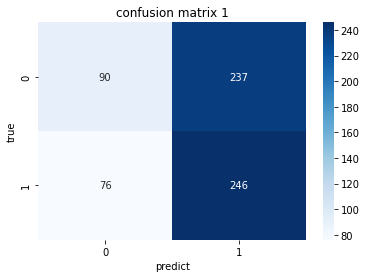

In [12]:
import seaborn as sn
ax = sn.heatmap(cm,annot=True,fmt='.20g',cmap="Blues")
ax.set_title('confusion matrix 1') #title
ax.set_xlabel('predict') #x axis
ax.set_ylabel('true') #y axis

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model3=DecisionTreeClassifier(max_depth=20, min_samples_split=0.1,min_samples_leaf=0.1, criterion="entropy",max_features='auto')
model3.fit(X_train,Y_train)
pred2=model3.predict(X_test)
pred2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,

In [46]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
print(classification_report(Y_test,pred2))

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       327
           1       0.52      0.30      0.38       322

    accuracy                           0.52       649
   macro avg       0.52      0.51      0.49       649
weighted avg       0.52      0.52      0.49       649



In [47]:
cm=confusion_matrix(Y_test,pred2,labels=[0,1])
cm

array([[239,  88],
       [226,  96]])

Text(33.0, 0.5, 'true')

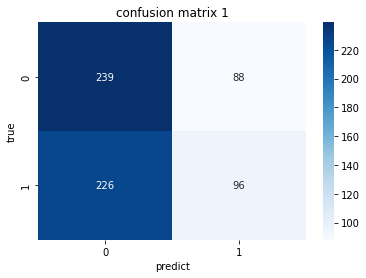

In [48]:
import seaborn as sn
ax = sn.heatmap(cm,annot=True,fmt='.20g',cmap="Blues")
ax.set_title('confusion matrix 1') #title
ax.set_xlabel('predict') #x axis
ax.set_ylabel('true') #y axis